In [33]:
# ! pip install numpy
import numpy as np 
import pandas as pd 
# import matplotlib.pylot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

# from pmdarima import auto_arima 

In [16]:
airline = pd.read_csv('AirPassengers.csv', 
                       index_col ='Month', 
                       parse_dates = True) 

In [17]:
# Print the first five rows of the dataset 
airline.head() 

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
# ETS Decomposition 
result = seasonal_decompose(airline['#Passengers'],  
                            model ='multiplicative') 

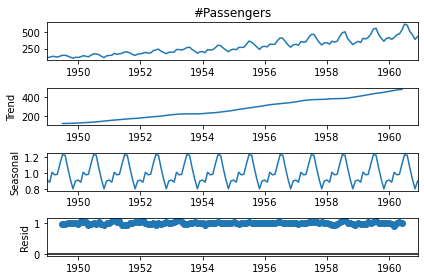

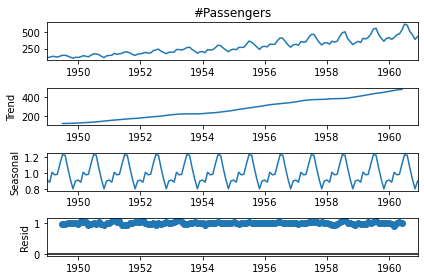

In [21]:
# ETS plot  
result.plot()

In [49]:
# Import the library 
from pmdarima.arima import auto_arima
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [43]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.24 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.31 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.38 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [44]:
# To print the summary 
stepwise_fit.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 16 Sep 2020   AIC                           1019.178
Time:                                     14:51:57   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Fit ARIMA Model to AirPassengers dataset


# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                            Wed, 16 Sep 2020   AIC                            896.027
Time:                                    14:54:27   BIC                            909.923
Sample:                                01-01-1949   HQIC                           901.670
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2981      0.075     -3.977      0.000      -0.445      -0.151
ar.S.L12       0.7100      0.223      3.177      0.001       0.272       1.148
ar.S.L24       0.2891      0.099      2.925      0.003       0.095       0.483
ma.S.L12      -0.9798      2.113     -0.464      0.643      -5.122       3.162
sigma2        88.3859    168.465      0.525      0.600    -241.799     418.571
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

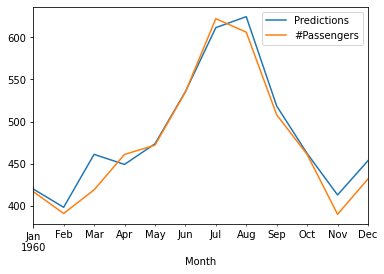

In [52]:
# Predictions of ARIMA Model against the test set
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 

In [57]:
#  Evaluate the model using MSE and RMSE
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["#Passengers"], predictions) 
  


17.153195932201

In [58]:
# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 

294.23213068847696

<AxesSubplot:xlabel='Month'>

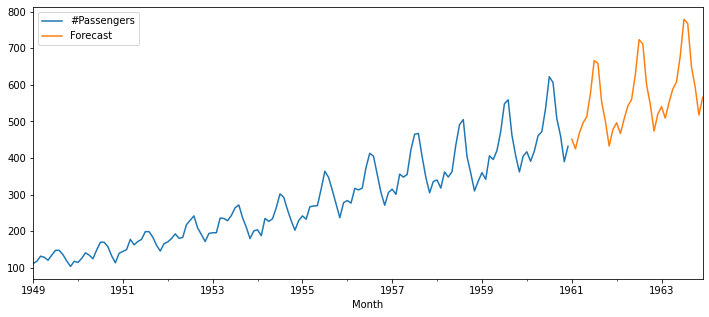

In [62]:
# Forecast using ARIMA Model
# Train the model on the full dataset 
model = model = SARIMAX(airline['#Passengers'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12),
                        enforce_stationarity=True,
                        enforce_invertibility=False)
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(airline),  
                          end = (len(airline)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
airline['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 